<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from tensorflow import math
from keras.utils.vis_utils import plot_model
if(tf.config.list_physical_devices('GPU')):
  print("yes")



In [3]:
nba_data=pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")

In [4]:
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [5]:
nba_data.isna().sum()
nba_data=nba_data.dropna()

In [6]:
nba_data_numeric=nba_data.copy()
del nba_data_numeric["first_name"]
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [7]:
def clean_currency(x):
  if isinstance(x,str):
    return(x,replace('$','').replace(',',''))
    return(x)

In [8]:
nba_data_numeric["salary"]=nba_data_numeric['salary'].apply(clean_currency).astype('float64')

In [9]:
nba_data

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Dylan,Windler,CLE,2239200.0,SF,25,50,0,459,37,...,0.833,21,68,89,34,14,3,16,47,110
285,Christian,Wood,HOU,13666667.0,C,26,68,67,2094,440,...,0.623,110,576,686,155,54,65,126,171,1218
286,Delon,Wright,ATL,8526316.0,SG,29,77,8,1452,122,...,0.857,50,170,220,188,93,19,45,56,342
287,Omer,Yurtseven,MIA,1489065.0,C,23,56,12,706,130,...,0.623,85,209,294,49,17,20,41,84,299


In [10]:
print(np.shape(nba_data_numeric))

(289, 27)


In [11]:
print(nba_data_numeric.describe())

       salary         age           g          gs           mp          fg  \
count     0.0  289.000000  289.000000  289.000000   289.000000  289.000000   
mean      NaN   25.768166   56.619377   30.415225  1373.657439  237.546713   
std       NaN    4.378557   18.081042   26.947104   698.833132  164.543135   
min       NaN   19.000000    9.000000    0.000000    35.000000    3.000000   
25%       NaN   22.000000   47.000000    5.000000   799.000000  110.000000   
50%       NaN   25.000000   62.000000   21.000000  1406.000000  212.000000   
75%       NaN   29.000000   70.000000   57.000000  1931.000000  324.000000   
max       NaN   38.000000   82.000000   80.000000  2743.000000  774.000000   

               fga         fg%          3p         3pa  ...         ft%  \
count   289.000000  289.000000  289.000000  289.000000  ...  289.000000   
mean    514.283737    0.458730   74.276817  208.335640  ...    0.758394   
std     347.674340    0.072096   63.139612  166.382283  ...    0.109234 

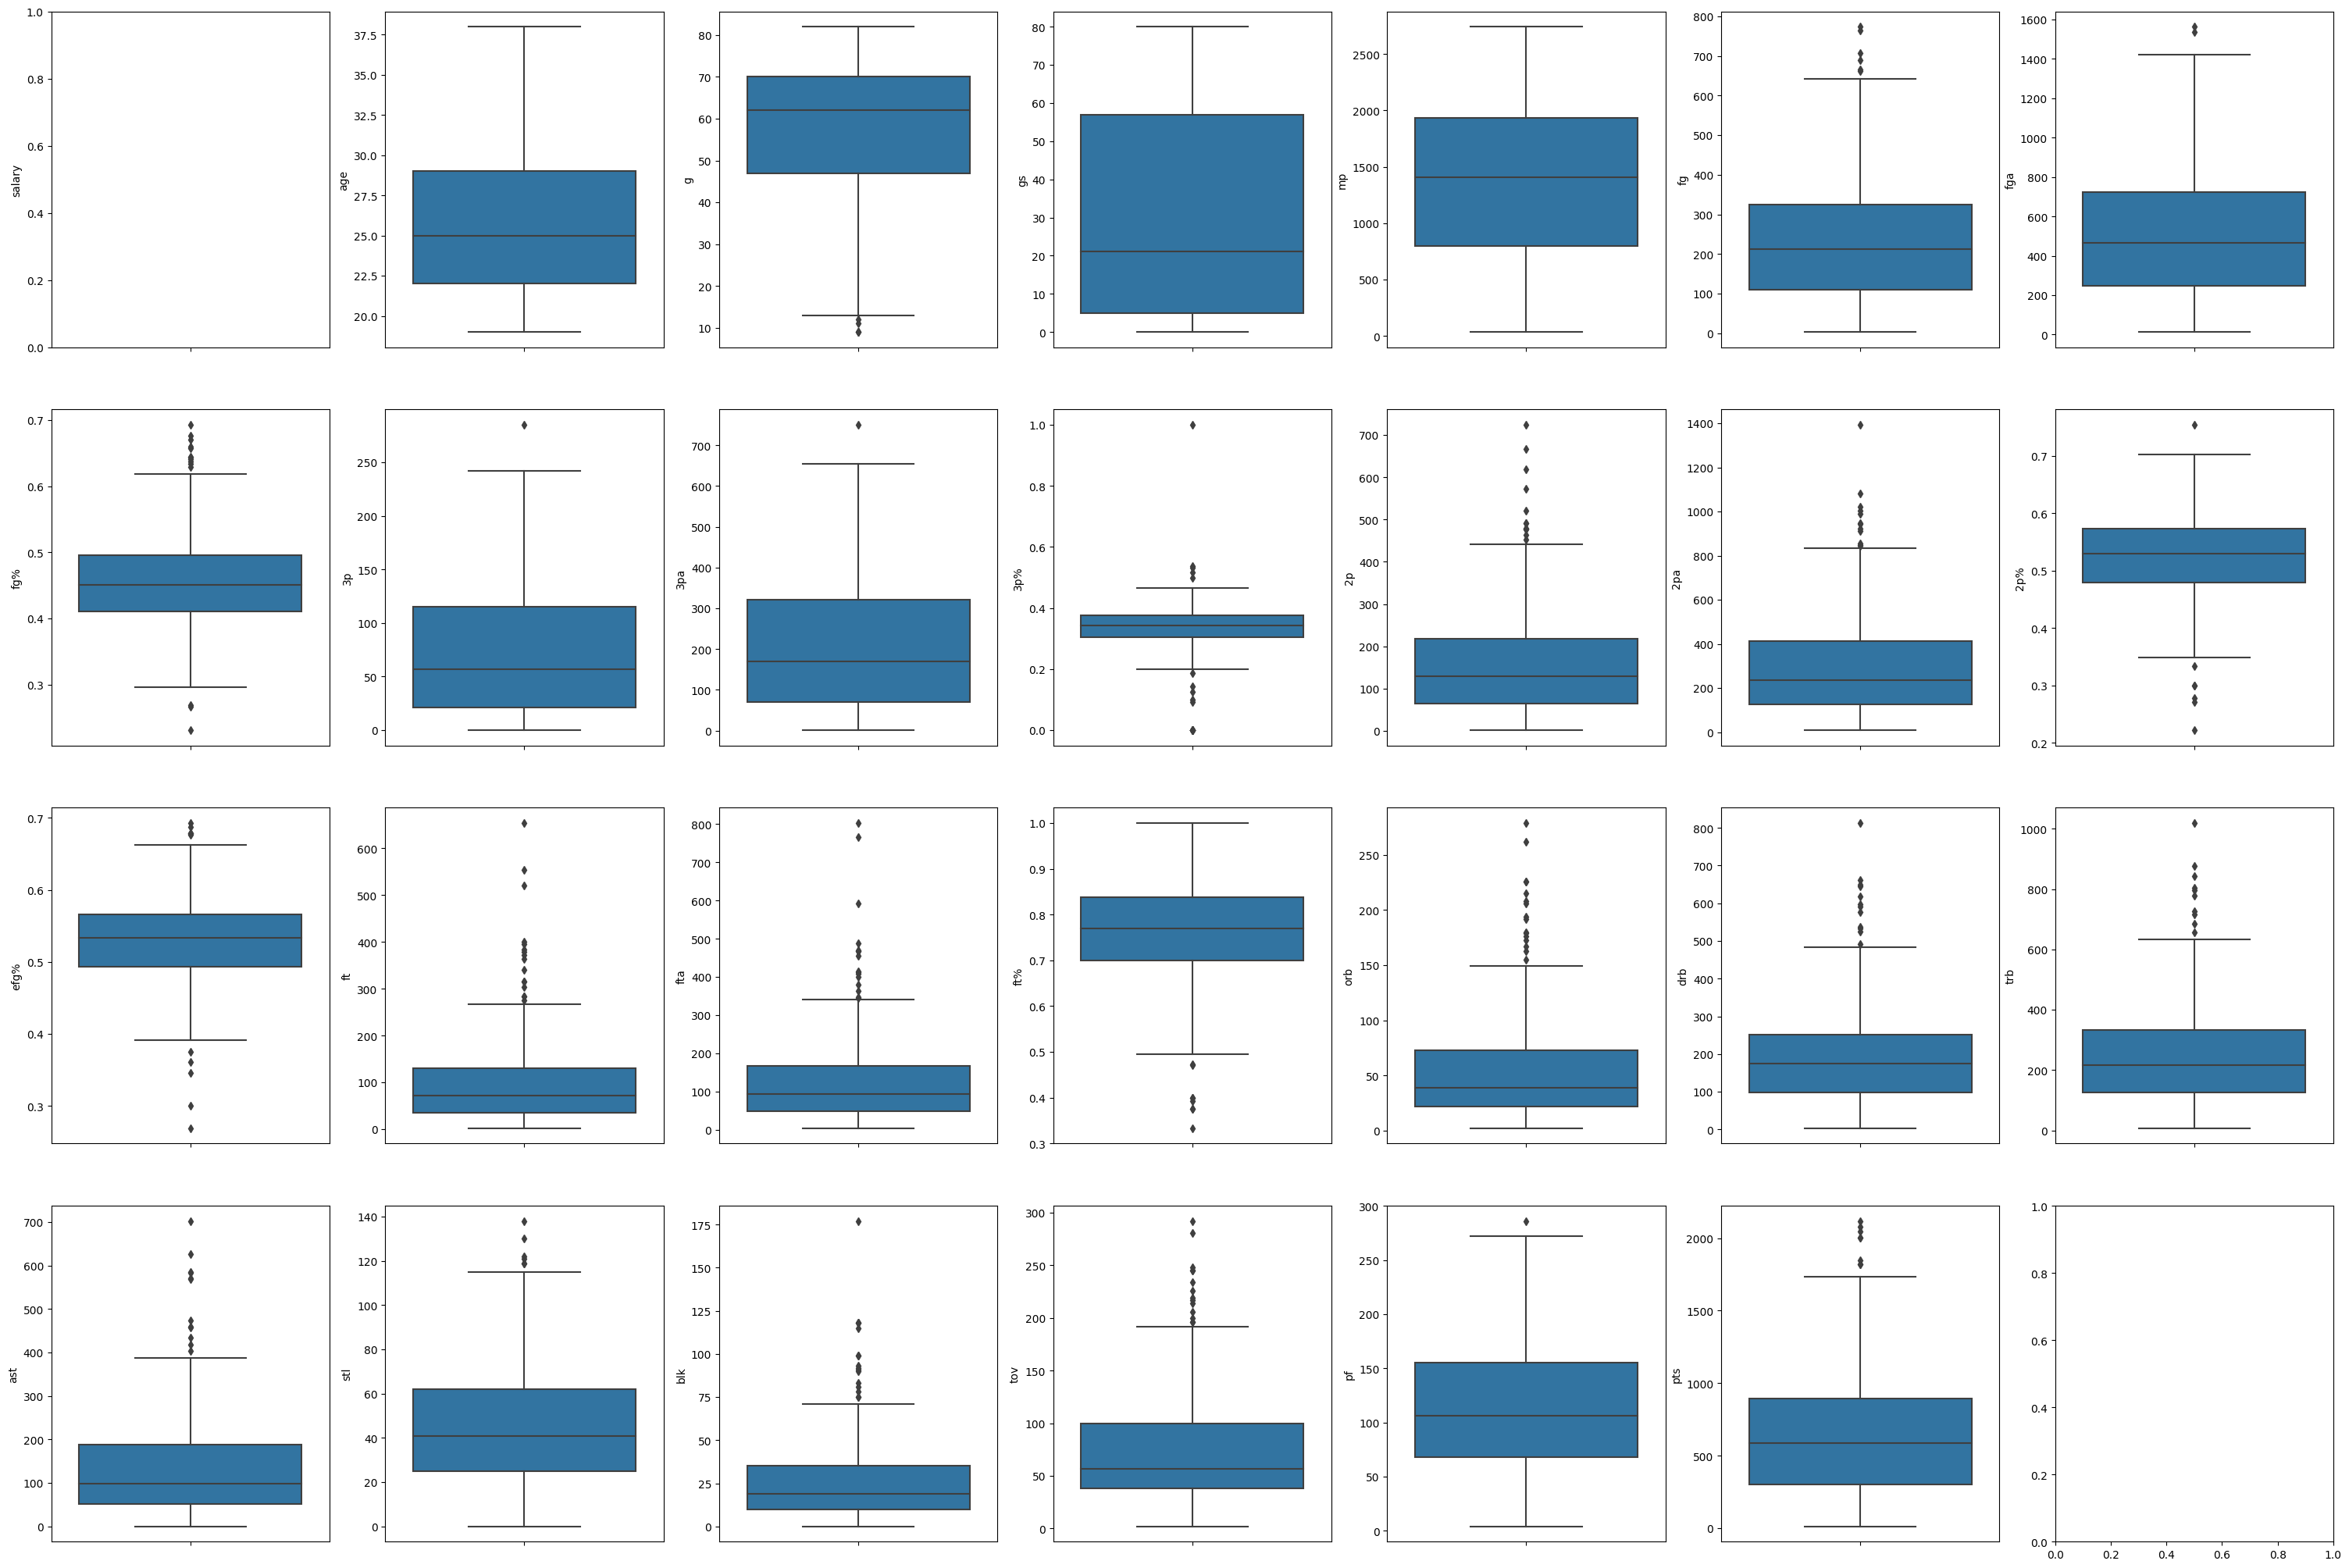

In [12]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(30,20))
index=0
axs=axs.flatten()
for k, v in nba_data_numeric.items():
  sns.boxplot(y=k,data=nba_data_numeric,ax=axs[index])
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


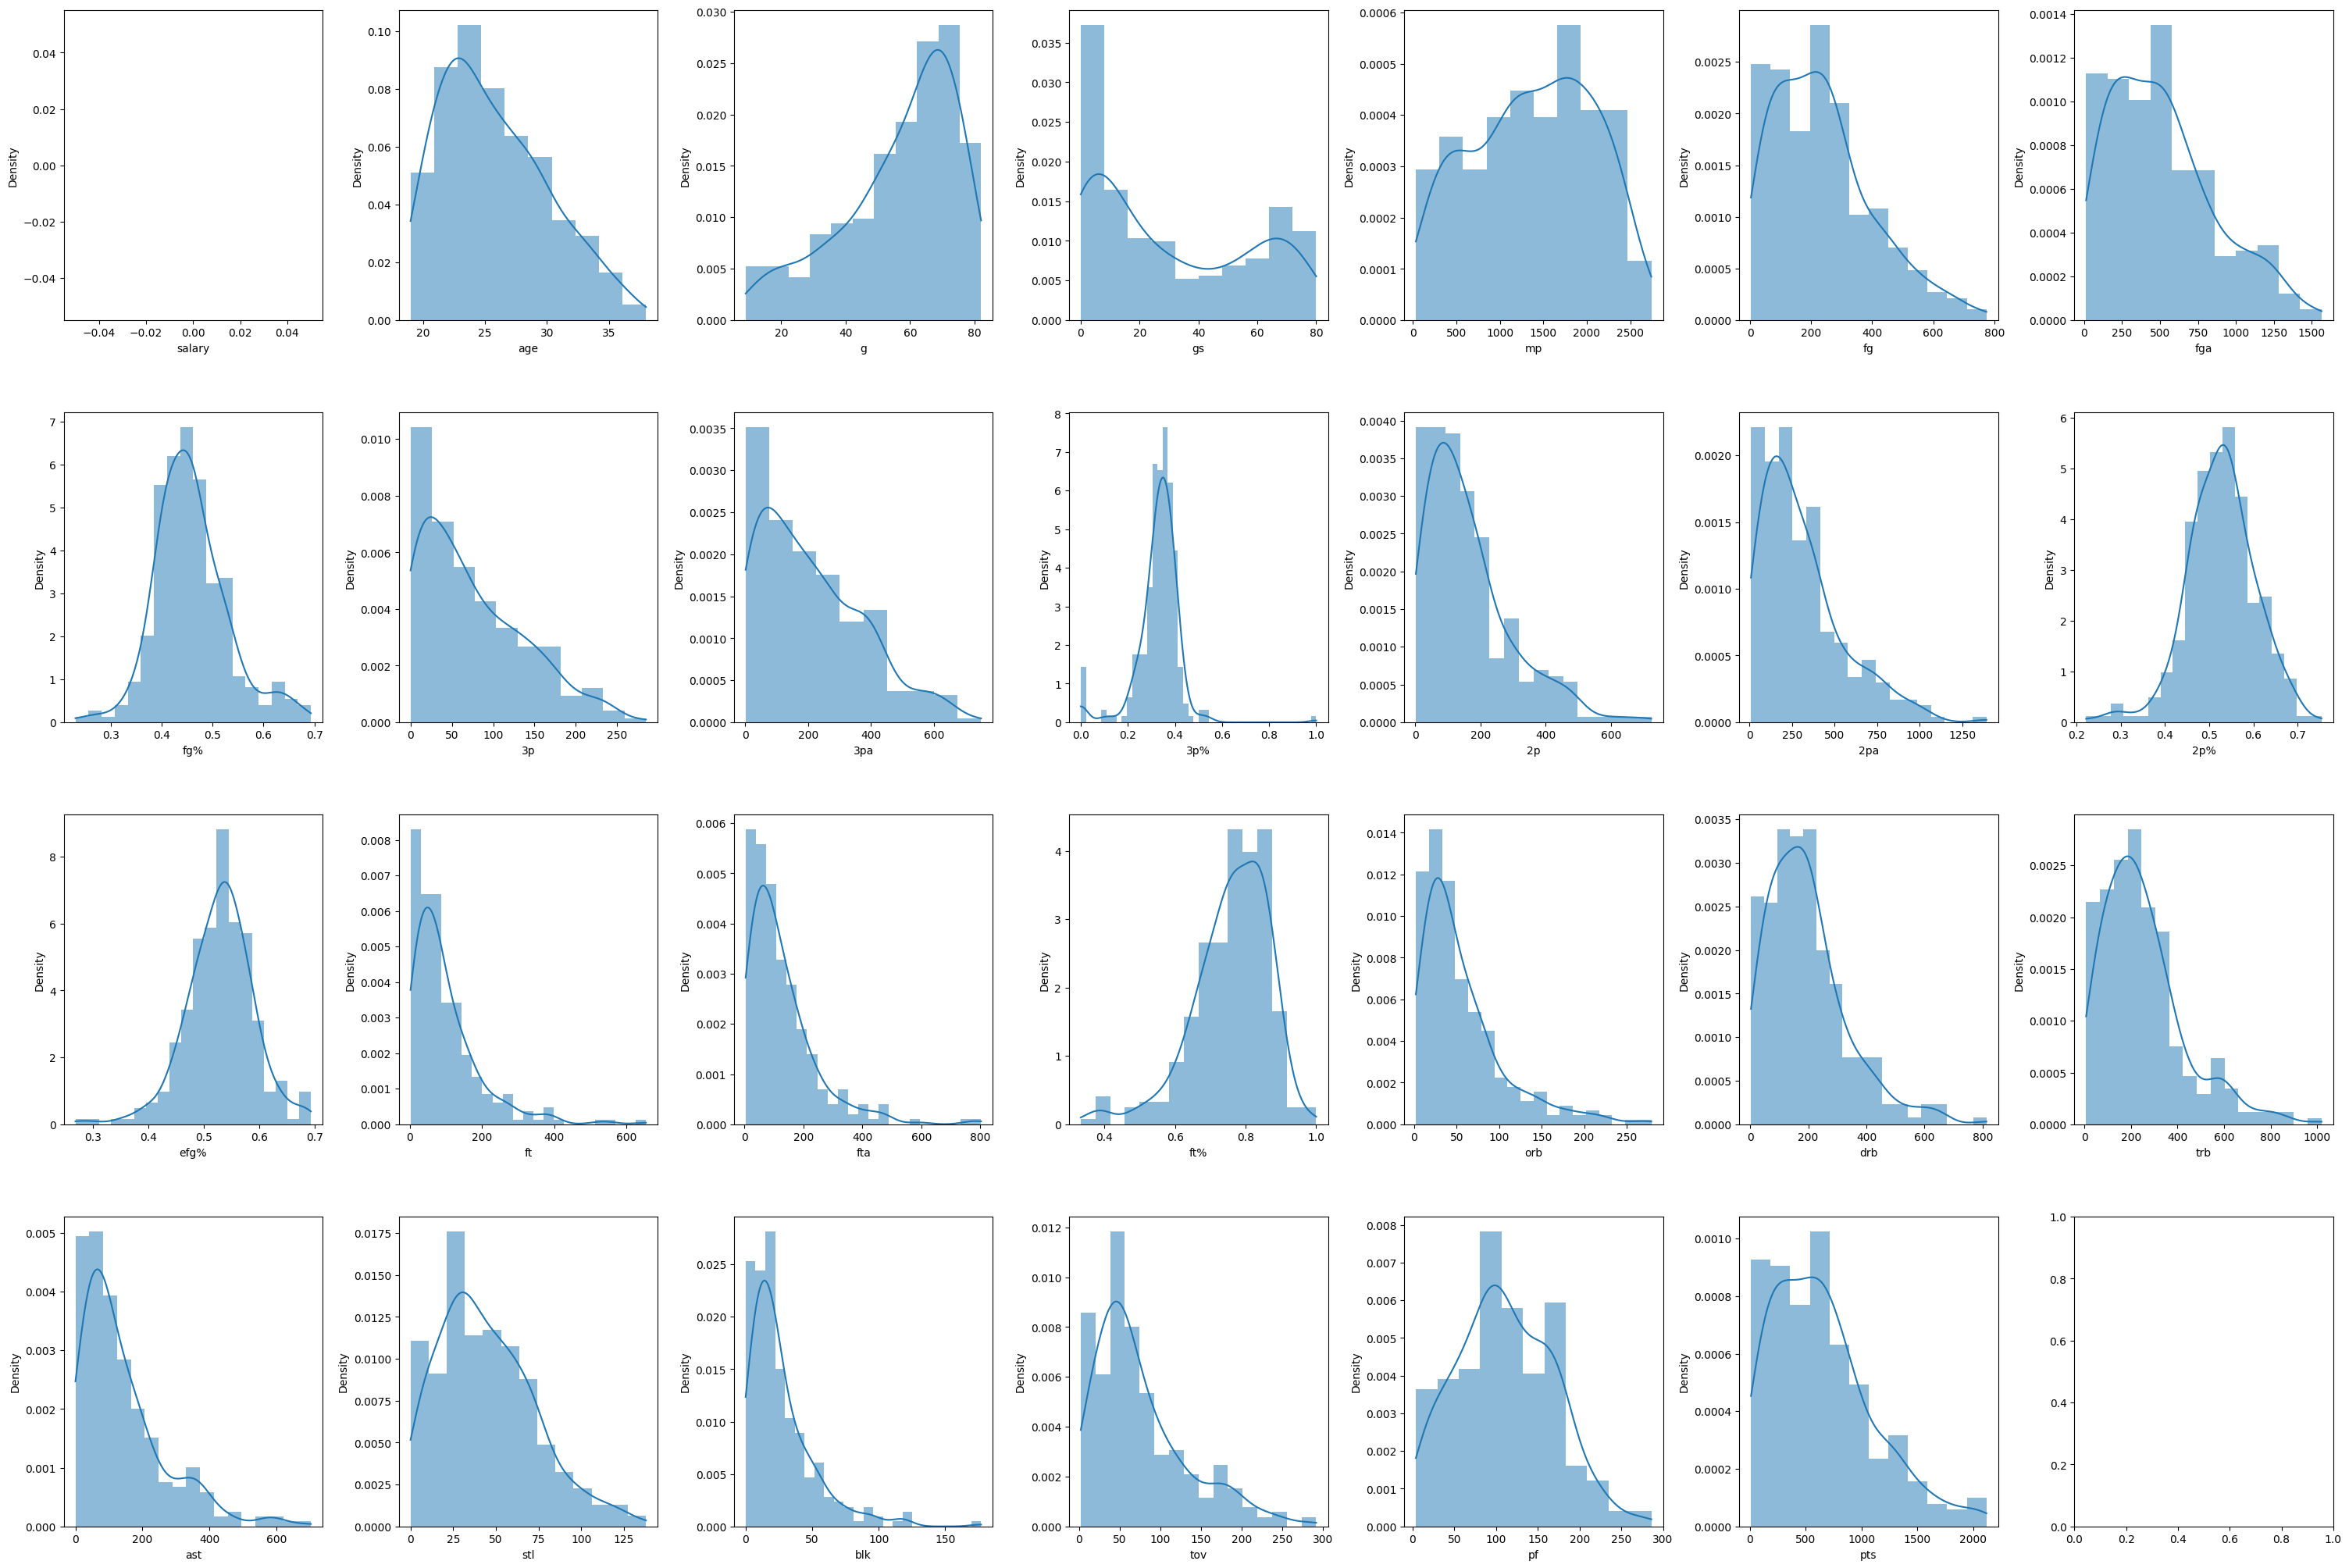

In [13]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(30,20))
index=0
axs=axs.flatten()
for k, v in nba_data_numeric.items():
  sns.histplot(v, ax=axs[index],kde=True,stat="density",linewidth=0)
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

<Axes: >

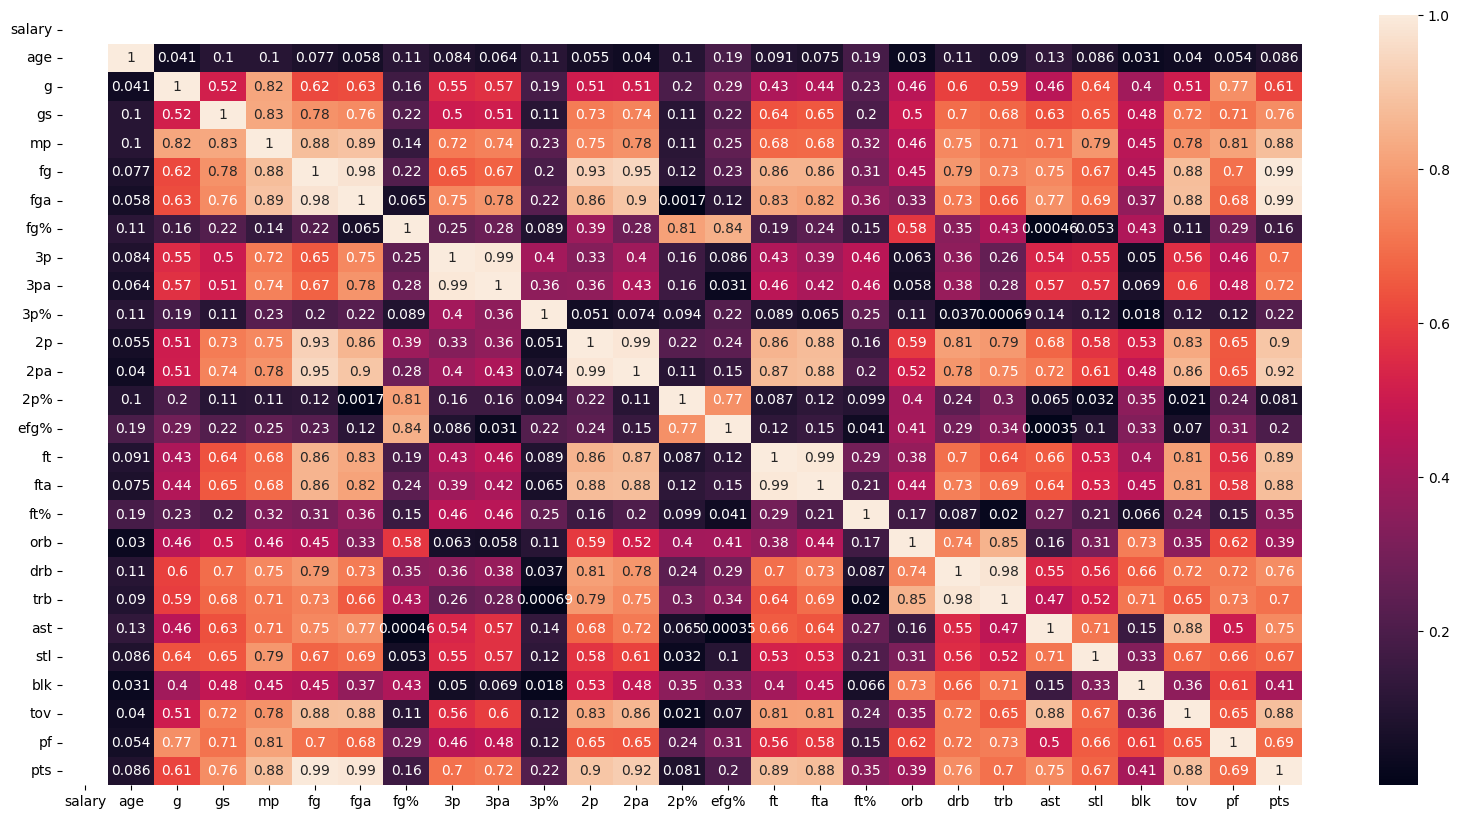

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(nba_data_numeric.corr().abs(),annot=True)

In [18]:
for k, v in nba_data_numeric.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col=v[(v<=q1-1.5*iqr)|( v>=q3+1.5*iqr)]
  perc=np.shape(v_col)[0]*100.0/np.shape(nba_data_numeric)[0]
  print("%s Outliers=%.2f%%"%(k,perc))

salary Outliers=0.00%
age Outliers=0.00%
g Outliers=1.73%
gs Outliers=0.00%
mp Outliers=0.00%
fg Outliers=2.08%
fga Outliers=0.69%
fg% Outliers=4.84%
3p Outliers=0.35%
3pa Outliers=0.35%
3p% Outliers=6.57%
2p Outliers=4.50%
2pa Outliers=4.15%
2p% Outliers=2.42%
efg% Outliers=3.81%
ft Outliers=5.54%
fta Outliers=5.54%
ft% Outliers=2.77%
orb Outliers=5.54%
drb Outliers=4.15%
trb Outliers=3.46%
ast Outliers=4.15%
stl Outliers=2.08%
blk Outliers=5.54%
tov Outliers=4.84%
pf Outliers=0.35%
pts Outliers=2.77%


In [19]:
scalar=tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [20]:
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [24]:
matrix=tf.constant([[1,2],[3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [27]:
tensor=tf.constant([[[1,2,3],
                    [4,5,6]],
                    [[7,8,9],
                     [10,11,12]],
                   [[13,14,15],
                    [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [29]:
v_tensor=tf.Variable([5,6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6], dtype=int32)>

In [30]:
print("index 0:",v_tensor[0])
v_tensor[0].assign(8)
print("index 0:",v_tensor[0])

index 0: tf.Tensor(5, shape=(), dtype=int32)
index 0: tf.Tensor(8, shape=(), dtype=int32)


In [31]:
rand_tensor=tf.random.Generator.from_seed(66)
rand_tensor=rand_tensor.normal(shape=(3,2),mean=0.0,stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

In [32]:
np_array=np.arange(1,25,dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [33]:
tensor2=tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [34]:
# 6*2*2=24
tensor3=tf.constant(np_array,shape=(6,2,2))
tensor3


<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

In [36]:
print("index 0:",tensor3[:1])
print("values in dims",tensor3.shape)
print("Dimensions:",tensor3.ndim)
print("total values:",tf.size(tensor3).numpy())
print("data type:",tensor3.dtype )

index 0: tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
values in dims (6, 2, 2)
Dimensions: 3
total values: 24
data type: <dtype: 'int32'>


In [37]:
ic_sales=tf.constant([[26,27,22,10,12,33],
                      [18,21,10,8,4,26],
                      [9,20,4,9,7,16],
                      [24,19,12,8,6,14]])

In [38]:
ic_sales

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[26, 27, 22, 10, 12, 33],
       [18, 21, 10,  8,  4, 26],
       [ 9, 20,  4,  9,  7, 16],
       [24, 19, 12,  8,  6, 14]], dtype=int32)>

In [40]:
ic_price=tf.constant([[3,2,4,4]])
ic_price

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]], dtype=int32)>

In [41]:
tf.matmul(ic_price,ic_sales)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]], dtype=int32)>

In [45]:
ct=make_column_transformer(
    (MinMaxScaler(),['age','pts'])
   
)

In [46]:
X=nba_data.drop("salary",axis=1)
y=nba_data["salary"]

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=66)


In [49]:
ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [50]:
X_train_normal

array([[0.22222222, 0.07787274],
       [0.44444444, 0.68138651],
       [0.5       , 0.43494777],
       [0.88888889, 0.16239316],
       [0.33333333, 0.33665717],
       [0.22222222, 0.36989554],
       [0.11111111, 0.30151947],
       [0.11111111, 0.4985755 ],
       [0.66666667, 0.15859449],
       [0.38888889, 0.49382716],
       [0.05555556, 0.26495726],
       [0.16666667, 0.6011396 ],
       [0.16666667, 0.29534663],
       [0.33333333, 0.27492877],
       [0.11111111, 0.27350427],
       [0.55555556, 0.18566002],
       [0.55555556, 0.5954416 ],
       [0.16666667, 0.2374169 ],
       [0.33333333, 0.10493827],
       [0.16666667, 0.31671415],
       [0.05555556, 0.06695157],
       [0.16666667, 0.66144349],
       [0.33333333, 0.85944919],
       [0.16666667, 0.00237417],
       [0.33333333, 0.44681861],
       [0.38888889, 0.44301994],
       [0.44444444, 0.62108262],
       [0.44444444, 0.73076923],
       [0.27777778, 0.41025641],
       [0.77777778, 0.24738841],
       [0.

In [61]:
tf.random.set_seed(66)
nba_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)

])

nba_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mae"])
fit_data=nba_model.fit(X_train_normal,y_train,epochs=200,verbose=0)


In [64]:
nba_model_loss,nba_model_mae=nba_model.evaluate(X_test_normal,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 3770231.7500 - mae: 3770231.7500


<Axes: ylabel='Epochs'>

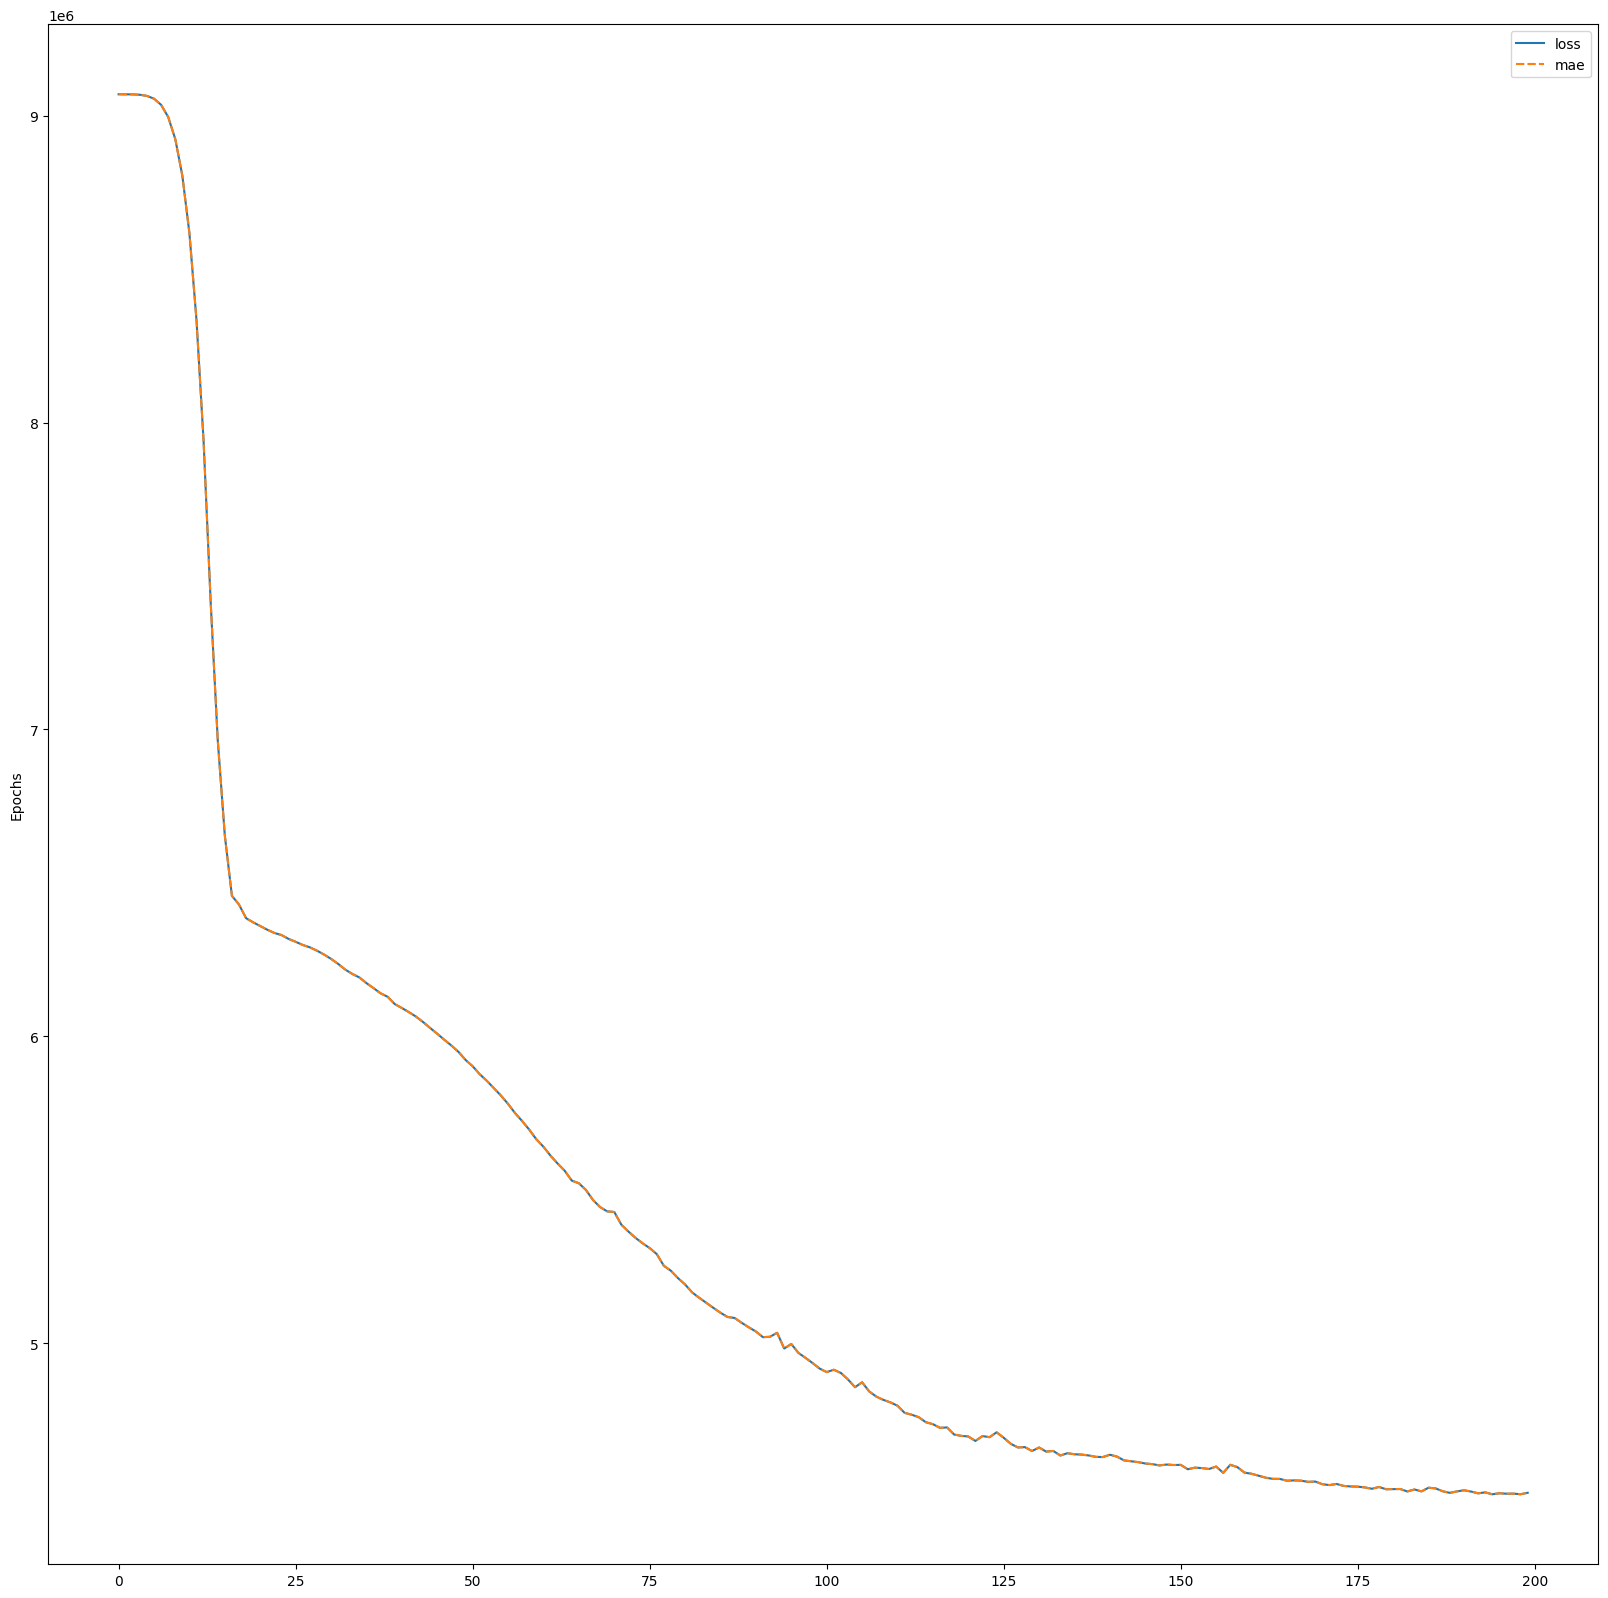

In [63]:
plt.figure(figsize=(20,20))
plt.ylabel("Loss")
plt.ylabel("Epochs")
sns.lineplot(data=fit_data.history)